In [1]:
import numpy as np
import pandas as pd

In [2]:
prices = pd.read_csv("data/sample_prices.csv")
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [3]:
returns = prices.pct_change()
returns.head()

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544


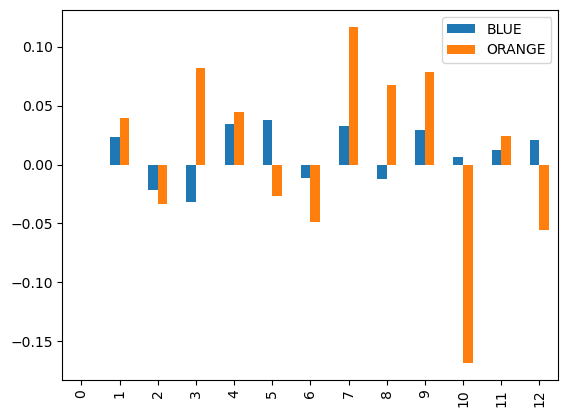

In [4]:
returns.plot.bar();

In [5]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [6]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [7]:
returns+1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [8]:
(((returns + 1).prod() -1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

# Annualization of Returns

In [9]:
rm=0.01 # monthly return
(1+rm)**12-1

0.12682503013196977

In [10]:
returns.dropna(inplace=True)
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [11]:
returns.std() #monthly volatility
returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [12]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=[0], parse_dates=True, na_values=-99.99)
returns.head()
columns=["Lo 20","Hi 20"]
returns = returns[columns]/100
returns.columns= ["SmallCaps", "LargeCaps"]
returns.index = pd.to_datetime(returns.index, format="%Y%m").to_period("M") # eliminate days
print(returns.head())
returns = returns["1999":"2015"]
print(returns.head())
print(returns.tail())

         SmallCaps  LargeCaps
1926-07    -0.0057     0.0333
1926-08     0.0384     0.0233
1926-09    -0.0048    -0.0009
1926-10    -0.0329    -0.0295
1926-11    -0.0055     0.0316
         SmallCaps  LargeCaps
1999-01     0.1114     0.0153
1999-02    -0.0399    -0.0172
1999-03    -0.0308     0.0368
1999-04     0.0824     0.0679
1999-05     0.0435    -0.0048
         SmallCaps  LargeCaps
2015-08    -0.0347    -0.0559
2015-09    -0.0610    -0.0333
2015-10     0.0385     0.0710
2015-11     0.0165     0.0015
2015-12    -0.0500    -0.0229


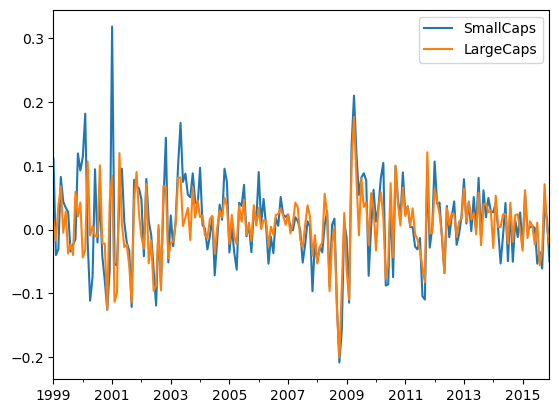

In [13]:
returns.plot.line();

In [14]:
returns.std()

SmallCaps    0.066076
LargeCaps    0.049858
dtype: float64

In [15]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCaps    0.228894
LargeCaps    0.172713
dtype: float64

In [18]:
(returns+1)

,SmallCaps,LargeCaps
1999-01,1.1114,1.0153
1999-02,0.9601,0.9828
1999-03,0.9692,1.0368
1999-04,1.0824,1.0679
1999-05,1.0435,0.9952
...,...,...
2015-08,0.9653,0.9441
2015-09,0.9390,0.9667
2015-10,1.0385,1.0710
2015-11,1.0165,1.0015


In [19]:
# prod multiplies all elements column by column
n_months= returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months)-1
return_per_month

SmallCaps    0.009069
LargeCaps    0.005094
dtype: float64

In [20]:
annualized_ret = (return_per_month +1)**12 -1
annualized_ret

SmallCaps    0.114426
LargeCaps    0.062865
dtype: float64

In [21]:
annualized_ret

SmallCaps    0.114426
LargeCaps    0.062865
dtype: float64

In [22]:
# same calculation
annualized_ret = (returns+1).prod()**(12/n_months)-1
annualized_ret

SmallCaps    0.114426
LargeCaps    0.062865
dtype: float64

In [23]:
annualized_ret/annualized_vol # return per unit of volatility

SmallCaps    0.499909
LargeCaps    0.363985
dtype: float64

In [24]:
# Sharpe Ratio
riskfree_rate = 0.03
excess_return = (annualized_ret - riskfree_rate)
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCaps    0.368844
LargeCaps    0.190287
dtype: float64